<font size=12px; color='darkgreen'><b>Income Predictions</b></font>

<div style="border:solid black 1px; padding: 20px">
<ul>
<li>Data set - income_pred.csv</li>
<br/>
<li>You were asked to build a predictive model for the income level of certain population (binary classification on 'class').</li>
<br/>   
<li>No additional information was provided on the data properties nor features. </li>
<br/>
<li>Feel free to take assumptions (explain them) and use any python libraries you might find useful.</li>
</ul>
</div>

<font size=4px; color='red'><b><u>Initialization - Import relevant libraries</u></b></font>

In [1]:
import pandas as pd
import numpy as np
import math
import statistics
import seaborn as sns
from scipy import stats as st
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from IPython import display
from sklearn.metrics import roc_auc_score
from IPython.display import Image
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,roc_auc_score,f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

## Load data & Explore

In [2]:
df = pd.read_csv('datasets/income_pred.csv')
#Getting info about size of the data, attributes, data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               32561 non-null  int64 
 1   age              32561 non-null  int64 
 2   workclass        32561 non-null  object
 3   fnlwgt:          32561 non-null  int64 
 4   education:       32561 non-null  object
 5   education-num:   32561 non-null  int64 
 6   marital-status:  32561 non-null  object
 7   occupation:      32561 non-null  object
 8   relationship:    32561 non-null  object
 9   race:            32561 non-null  object
 10  sex:             32561 non-null  object
 11  capital-gain:    32561 non-null  int64 
 12  capital-loss:    32561 non-null  int64 
 13  hours-per-week:  32561 non-null  int64 
 14  native-country:  32561 non-null  object
 15  class            32561 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [3]:
df.sample(5)

,ID,age,workclass,fnlwgt:,education:,education-num:,marital-status:,occupation:,relationship:,race:,sex:,capital-gain:,capital-loss:,hours-per-week:,native-country:,class
19047,19048,38,Private,197711,10th,6,Divorced,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,Female,0,0,40,Portugal,<=50K
26253,26254,39,Self-emp-not-inc,195253,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,>50K
27832,27833,38,Self-emp-inc,189679,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
28986,28987,40,Private,367533,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,2580,0,40,United-States,<=50K
961,962,32,Private,169240,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,White,Female,0,0,38,United-States,<=50K


* We have a large dataframe with 32561 entries
* The dataframe has 16 columns: 9 of type object, 7 of type int64
* It seems that there are no missing values

## Data Cleaning

### Renaming The Columns

**Renaming columns, replace '-' with '_' and lower case all the names**

In [4]:
df.columns = ['id','age','workclass','final_weight','education','education_num','marital_status','occupation','relationship','race'
             ,'sex','capital_gain','capital_loss','hours_per_week','native_country','class'] 

In [5]:
df.columns

Index(['id', 'age', 'workclass', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'class'],
      dtype='object')

### Value Counts For Each Column

In [6]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- id ---
1        1
21704    1
21717    1
21716    1
21715    1
        ..
10850    1
10849    1
10848    1
10847    1
32561    1
Name: id, Length: 32561, dtype: int64
---- age ---
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
---- workclass ---
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
---- final_weight ---
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: final_weight, Length: 21648, dtype: int64
---- education ---
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
1

* We see that there are unusual values '?' in columns: workclass, occupation and native_country
* These values need to be modified, keeping them will distort the final results

### Replacing Unusual Values With NaN

* Sicne the features where there are unusual values are categorical features , and not predictable like numerical ones we are going to replace them with NaN 

In [7]:
df=df.replace('?', np.nan)
size_with_nan = df.shape[0]

In [8]:
df.isna().sum()

id                   0
age                  0
workclass         1836
final_weight         0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
class                0
dtype: int64

In [9]:
nan_sum = df.isnull().any(axis=1).sum()
print(nan_sum)

2399


**There are 2399 entries with missing values, some rows have multiple missing values**

In [10]:
size_with_no_nan = size_with_nan - (nan_sum)
ratio_nan = ((size_with_no_nan)/size_with_nan)*100
print(ratio_nan)

92.63229016307854


* Size of dataframe with no missing values will be 92.63% of the original size
* Removing NaN will not have significant effect due to the low ratio of NaNs

In [11]:
df.dropna(inplace=True)

### Adding new column - age group

In [12]:
df.loc[df['age'].between(17,20), 'age_group'] = '17-20'
df.loc[df['age'].between(21,30), 'age_group'] = '21-30'
df.loc[df['age'].between(31,40), 'age_group'] = '31-40'
df.loc[df['age'].between(41,50), 'age_group'] = '41-50'
df.loc[df['age'].between(51,60), 'age_group'] = '51-60'
df.loc[df['age'].between(61,70), 'age_group'] = '61-70'
df.loc[df['age'].between(71,80), 'age_group'] = '71-80'
df.loc[df['age'].between(81,90), 'age_group'] = '81-90'


In [13]:
df['age_group'].value_counts()

31-40    8163
21-30    7599
41-50    6710
51-60    3886
17-20    1998
61-70    1422
71-80     309
81-90      75
Name: age_group, dtype: int64

* The highest age group 31-40 with frequency of 8163 entries
* The lowest age group is 81-90 - no surprise 

In [14]:
print(df[['age','final_weight','capital_gain','capital_loss','hours_per_week']].describe())

                age  final_weight  capital_gain  capital_loss  hours_per_week
count  30162.000000  3.016200e+04  30162.000000  30162.000000    30162.000000
mean      38.437902  1.897938e+05   1092.007858     88.372489       40.931238
std       13.134665  1.056530e+05   7406.346497    404.298370       11.979984
min       17.000000  1.376900e+04      0.000000      0.000000        1.000000
25%       28.000000  1.176272e+05      0.000000      0.000000       40.000000
50%       37.000000  1.784250e+05      0.000000      0.000000       40.000000
75%       47.000000  2.376285e+05      0.000000      0.000000       45.000000
max       90.000000  1.484705e+06  99999.000000   4356.000000       99.000000


## EDA

###  Income Class Distribution

In [15]:
def func(pct):
    return "{:1.1f}%".format(pct)

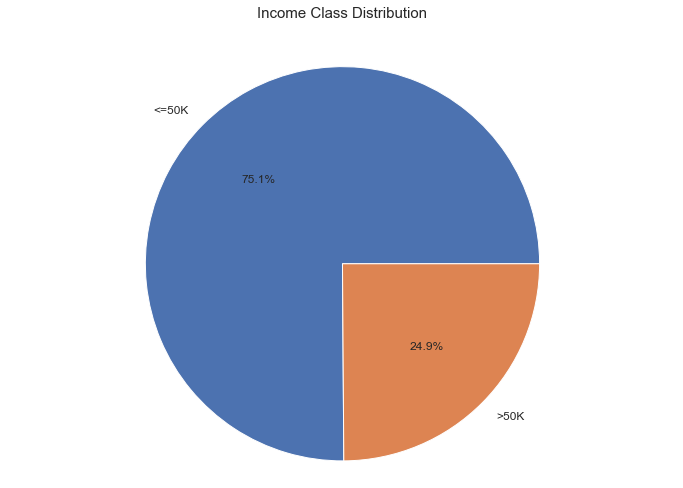

In [16]:
plt.figure(figsize=(12,8))
df.groupby('class').size().plot(kind='pie',textprops={'fontsize': 12}, autopct=func)
plt.title('Income Class Distribution',fontsize=15,y=1.05)
plt.ylabel(None)
plt.axis('equal')
plt.show()

* The ratio of people who gain less/equal than 50K is significantly higher than those who gain more than 50K
* the target class seems imbalanced

###  Gender Distribution

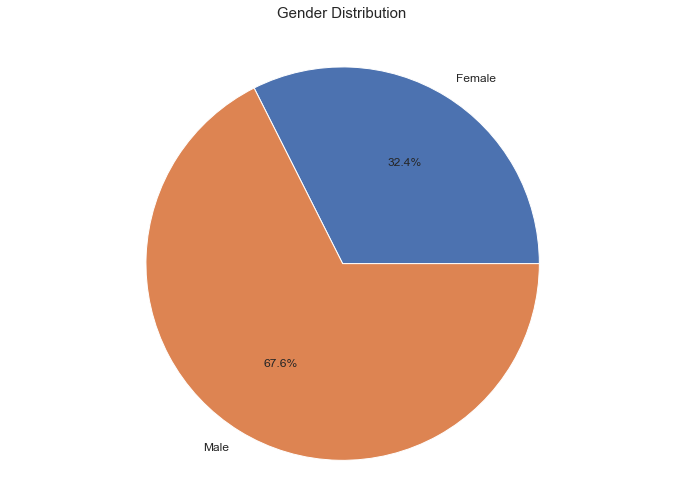

In [17]:
plt.figure(figsize=(12,8))
df.groupby('sex').size().plot(kind='pie',textprops={'fontsize': 12}, autopct=func)
plt.title('Gender Distribution',fontsize=15,y=1.05)
plt.ylabel(None)
plt.axis('equal')
plt.show()

* There are two times of Male Data than this of Females

In [18]:
numeric_class = df['class'].map({'<=50K': 0, '>50K': 1}).astype(int)

#### Income Class &Gender Density

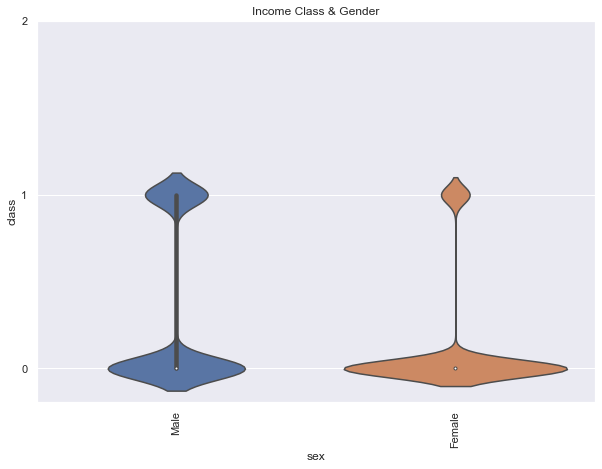

In [19]:
plt.figure(figsize=(10,7))
ax = sns.violinplot( x="sex",y=numeric_class, data=df)
plt.xticks(rotation='90')
plt.yticks(np.arange(0, 3, 1))
plt.title('Income Class & Gender',fontsize=12,y=1)
plt.show()

* Density of female employees is higher where the income class is less/equal 50K than this where the income class is higher than 50K 
* For males it is the opposite of the above 
  -  i.e: Low density around income class <=50K, a higher density where income class is >50K

### Age group Distribution

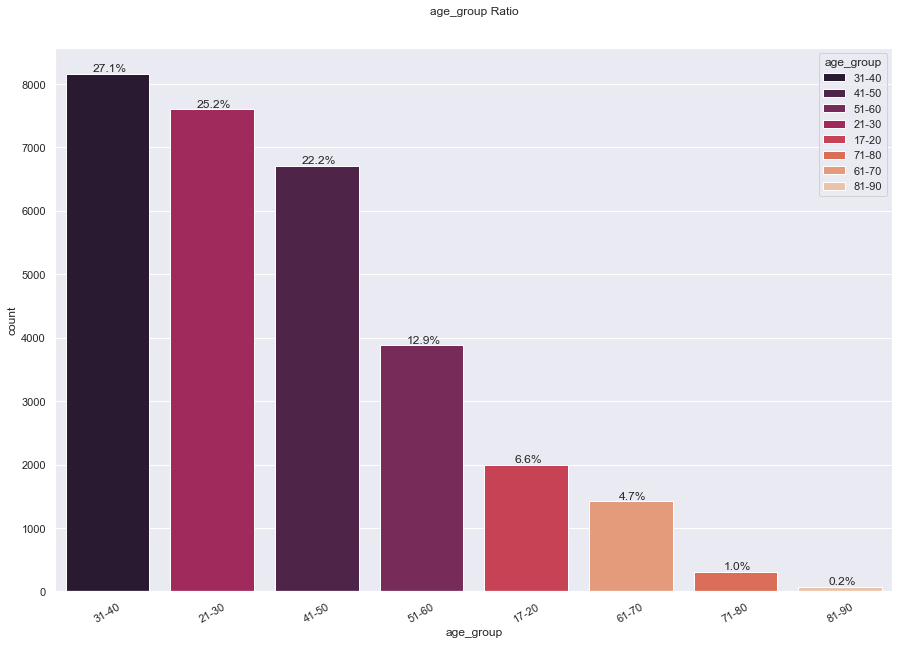

In [20]:
plt.figure(figsize=(15,10))
total = float(len(df))
order_index = df['age_group'].value_counts().index
ax = sns.countplot(x='age_group',hue='age_group',data=df,palette="rocket",dodge=False,order = order_index)
plt.title('age_group Ratio',fontsize=12,y=1.05)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',xytext=(2, 2), textcoords='offset points')
plt.xticks(rotation='30')
plt.show()

* We can see that there are significant decrease on the frequency between the groups 41-50 & 51-60 
* It seems that on the age group 51-60 employees tend to churn/ be laid off 

### Income Class & Age Density

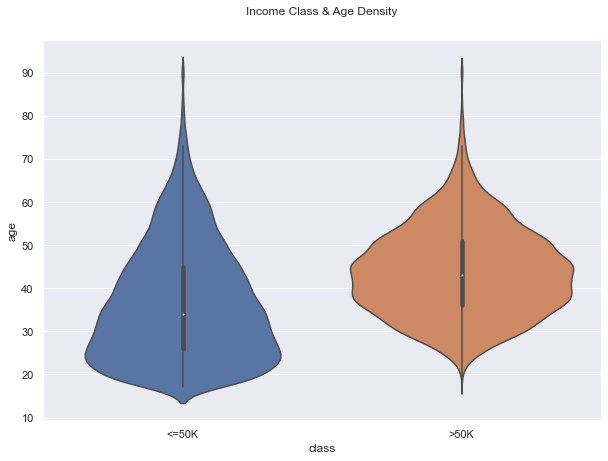

In [21]:
plt.figure(figsize=(10,7))
ax = sns.violinplot(x="class", y="age", data=df)
plt.title('Income Class & Age Density',fontsize=12,y=1.05)
plt.show()

* Between 35 -50 there are the highest density of employees who gain more than 50K
* Between 20-35 there are the highest density of employees who gain less/equal than 50K

### Income Class & Capital Gain Density

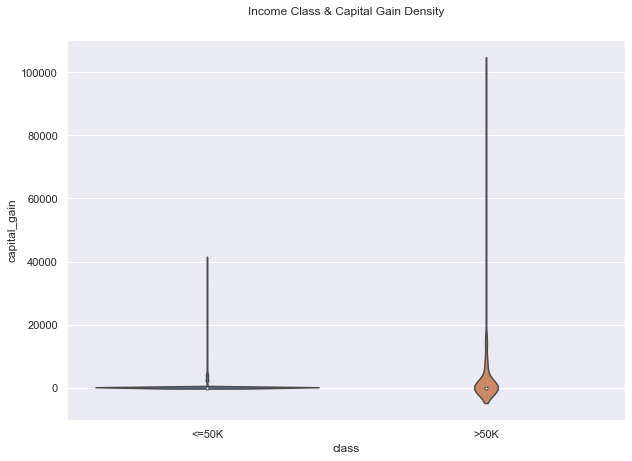

In [22]:
plt.figure(figsize=(10,7))
ax = sns.violinplot(x="class", y="capital_gain", data=df)
plt.title('Income Class & Capital Gain Density',fontsize=12,y=1.05)
plt.show()

* Most of the employees who have capital gain above 40K have income class of >50K
* Most employees who have zero capital gain have income class of <=50K

### Income Class & Capital Loss Density

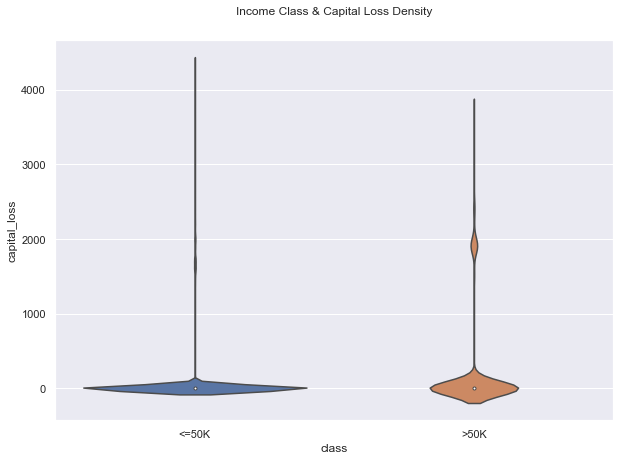

In [23]:
plt.figure(figsize=(10,7))
ax = sns.violinplot(x="class", y="capital_loss", data=df)
plt.title('Income Class & Capital Loss Density',fontsize=12,y=1.05)
plt.show()

* Employees with low capital loss values usually gain less/equal than 50K 
* Employees who gain less/equal than 50K have wider range of capital loss 
* Between capital loss values 1700-2000 employees are usually gain more than 50K 

### Income Class & Weekly Work Hours Density

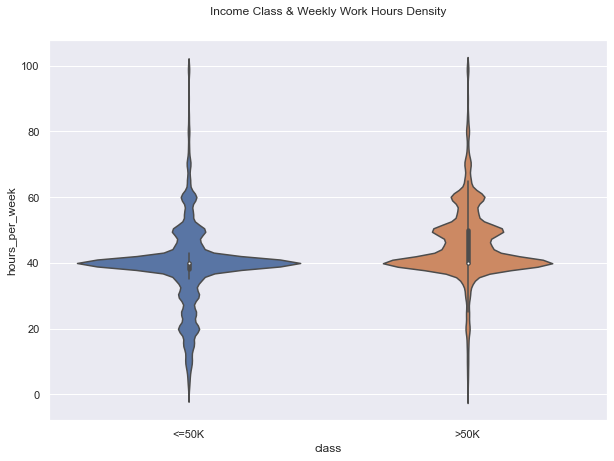

In [24]:
plt.figure(figsize=(10,7))
ax = sns.violinplot(x="class", y="hours_per_week", data=df)
plt.title('Income Class & Weekly Work Hours Density',fontsize=12,y=1.05)
plt.show()

* We can see that the highest desnity is around the value of 40 hours per week and that is due to the popular average weekly work hours 
* The density of employees who work around 40 hours and have income class of <=50K is higher than those who have income class of >50K 
* The density of employees who work between 50-60 hours and have income class of >50K is higher than those who have income class of <=50K

### Income Class & Final Weight Density

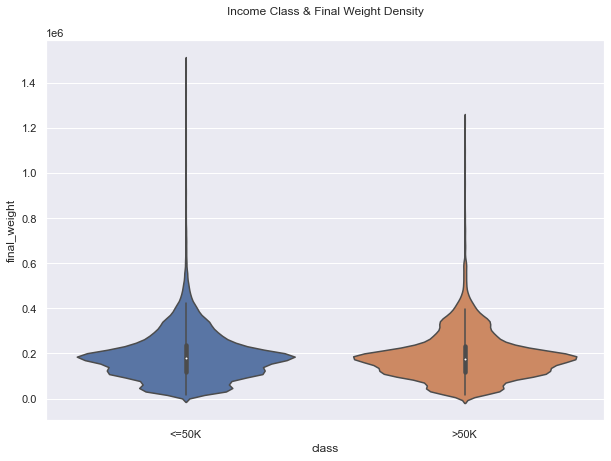

In [25]:
plt.figure(figsize=(10,7))
ax = sns.violinplot(x="class", y="final_weight", data=df)
plt.title('Income Class & Final Weight Density',fontsize=12,y=1.05)
plt.show()

* It seems that there are no big difference on the density between the two groups in the range final weight 0-0.6e
* From final weight 1.3e there are approximatly no employyes who gain more than 50K

### Income Class & Education

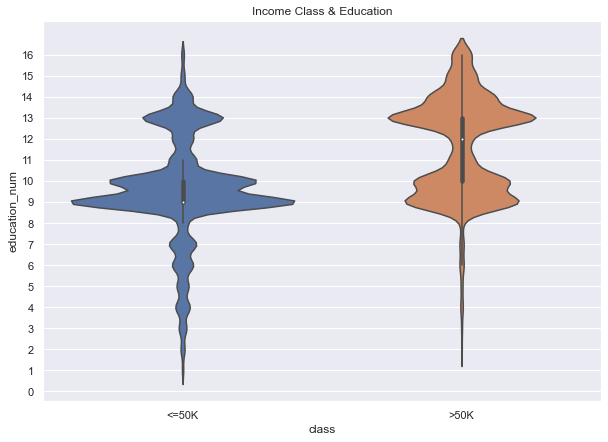

In [26]:
plt.figure(figsize=(10,7))
ax = sns.violinplot(x="class", y="education_num", data=df)
plt.yticks(np.arange(0, 17, 1))
plt.title('Income Class & Education',fontsize=12,y=1)
plt.show()

* We can see that the density of employees who their education categories between 1-8 are usually gaining less/equal 50K 
* Between 11-12 density of the two groups (<=50K, >50K) look very similar to each other 
* From education levels 13 -16 employees tend to gain more than 50K 
* It can be concluded that the higher education level the higher is the income level

### Freqencies Of Marital Status Types

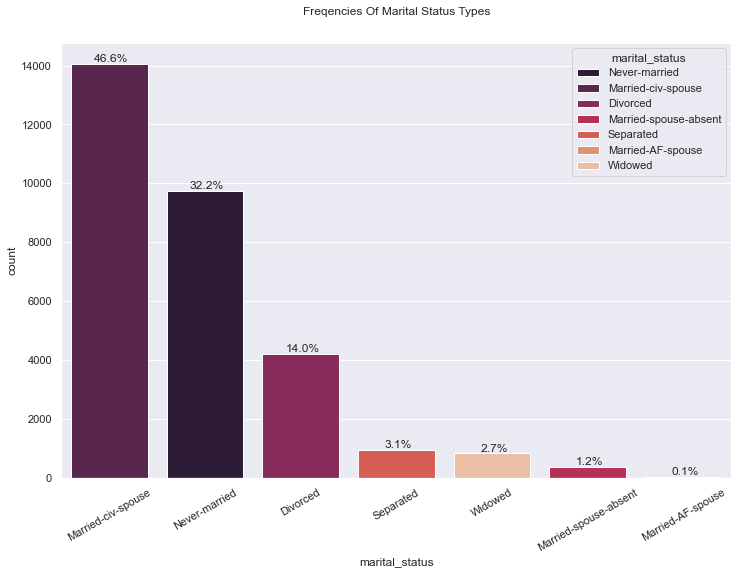

In [27]:
plt.figure(figsize=(12,8))
total = float(len(df))
order_index = df['marital_status'].value_counts().index
ax = sns.countplot(x='marital_status',hue='marital_status',data=df,palette="rocket",dodge=False,order = order_index)
plt.title('Freqencies Of Marital Status Types',fontsize=12,y=1.05)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',xytext=(2, 2), textcoords='offset points')
plt.xticks(rotation='30')
plt.show()

* Married-civ-spouse is the most frequent martial status
* Married-AF-spouse is the least frequent martial status 

#### Income Class & Martial Status Density

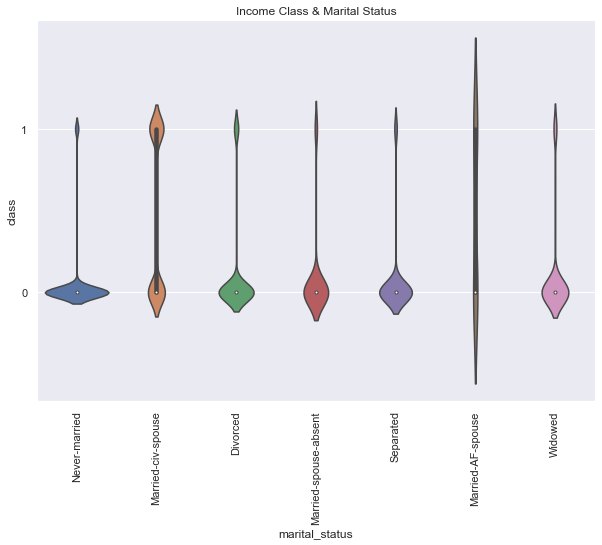

In [28]:
plt.figure(figsize=(10,7))
ax = sns.violinplot( x="marital_status",y=numeric_class, data=df)
plt.xticks(rotation='90')
plt.yticks(np.arange(0, 1.1, 1))
plt.title('Income Class & Marital Status',fontsize=12,y=1)
plt.show()

* Never married, Separated,Married-spouse-absent, Widowed employees usually gain less than 50K
* Divorced Employees tend to have income class of <=50K, but there are small amout who get >50K 
* Married-cv-spouse employees income class seems to be unpredictable - half get <=50K the other half get >50K
* Married-AF-spouse - violin shape look stange due to the low ratio of employees who have this status

### Freqencies Of Relationship Types 

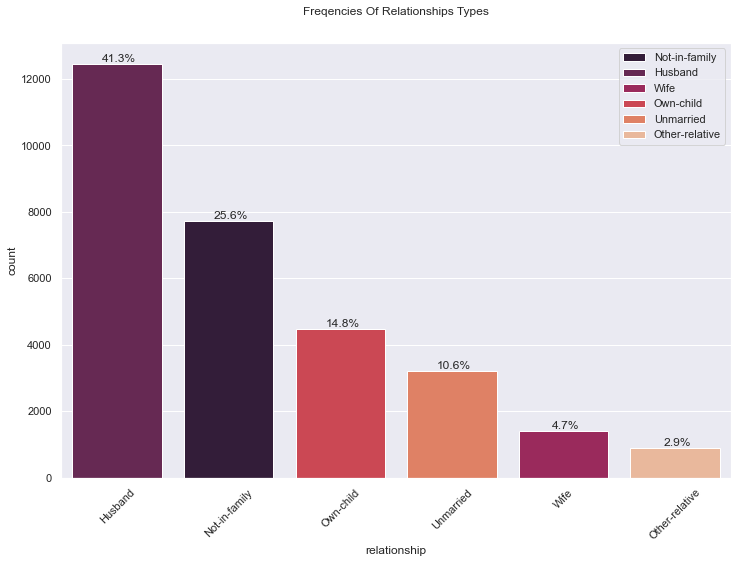

In [29]:
plt.figure(figsize=(12,8))
total = float(len(df))
order_index = df['relationship'].value_counts().index
ax = sns.countplot(x='relationship',hue='relationship',data=df,palette="rocket",dodge=False,order = order_index)
plt.title('Freqencies Of Relationships Types',fontsize=12,y=1.05)
plt.legend(loc='upper right')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',xytext=(2, 2), textcoords='offset points')
plt.xticks(rotation='45')
plt.show()

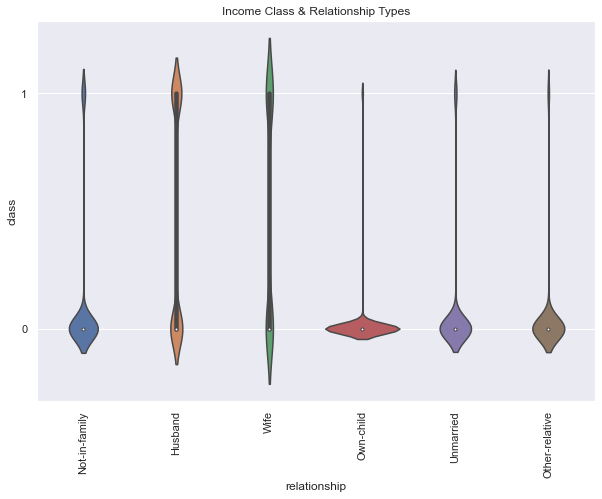

In [30]:
plt.figure(figsize=(10,7))
ax = sns.violinplot( x="relationship",y=numeric_class, data=df)
plt.xticks(rotation='90')
plt.yticks(np.arange(0, 1.1, 1))
plt.title('Income Class & Relationship Types',fontsize=12,y=1)
plt.show()

* Employees with own child relationship have the highest density around income class of <=50K 
* Employees with 'Not in family, unmarried, other relative' relationship type usually get <=50k
* Employees with 'Husband'/'wife' relationship their income class seems to be unpredictable - half get <=50K the other half get >50K
   * 'Husband' look more dense around both of the groups [<=50K, >50K] due to its high ratio among the other relationship types
   * 'Wife' relationship type - violin looks slightly strange due to its high ratio among the other relationship types and the distribution of the values [<=50K, >50K]

### Freqencies Of Occupations Types

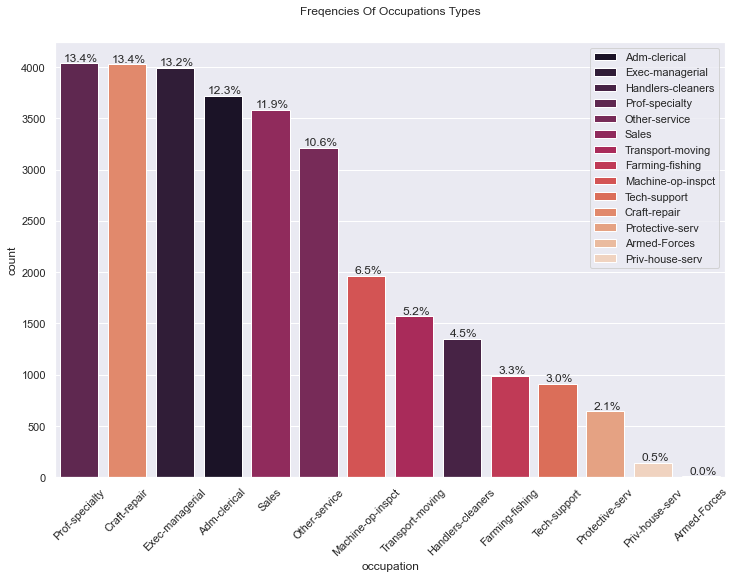

In [31]:
plt.figure(figsize=(12,8))
total = float(len(df))
order_index = df['occupation'].value_counts().index
ax = sns.countplot(x='occupation',hue='occupation',data=df,palette="rocket",dodge=False,order = order_index)
plt.title('Freqencies Of Occupations Types',fontsize=12,y=1.05)
plt.legend(loc='upper right')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',xytext=(2, 2), textcoords='offset points')
plt.xticks(rotation='45')
plt.show()

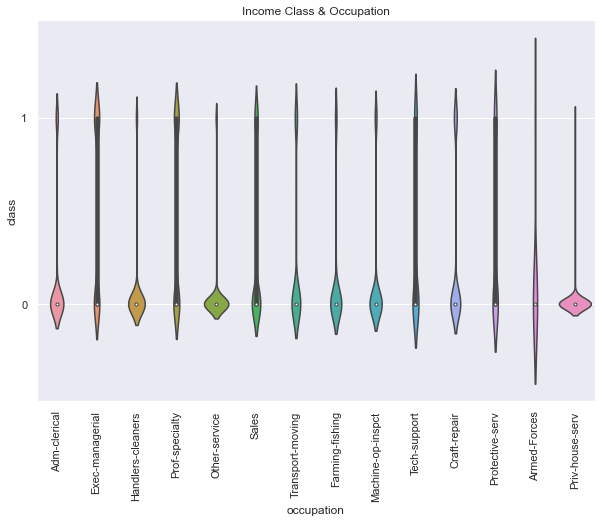

In [32]:
plt.figure(figsize=(10,7))
ax = sns.violinplot( x="occupation",y=numeric_class, data=df)
plt.xticks(rotation='90')
plt.yticks(np.arange(0, 1.1, 1))
plt.title('Income Class & Occupation',fontsize=12,y=1)
plt.show()

* Exec-managerial, Prof-speciality employess - income class seems to be unpredictable - half get <=50K the other half get >50K
* On an overall look there are no occupation type that has significant high density around >50K 
* Other service Priv-House-Serv, Adm-clenical have higher density around <=50K

## Data Preparation

### Change Data Type Of Target 

In [33]:
df['class'] = df['class'].map({'<=50K': 0, '>50K': 1}).astype(int)

### Categorizing Features - Numerical  & Categorical

In [34]:
numerical_features = ['age','final_weight','capital_gain','capital_loss','hours_per_week']
categorical_features = ['workclass','marital_status','occupation','relationship','race','native_country']

### Feature importance

In [35]:
df_features_imp = df.copy()
df_features_imp.drop(columns=['id','age_group'],inplace=True)
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df_features_imp['class'])

categorical_attributes = df_features_imp.select_dtypes(include=[int,object]).drop('class',axis=1)


features_importance = categorical_attributes.apply(compute_mutual_information).sort_values(ascending=False)

print(features_importance)

final_weight      0.402437
relationship      0.115186
marital_status    0.109150
capital_gain      0.083834
age               0.067567
education         0.064736
education_num     0.064736
occupation        0.064597
hours_per_week    0.041709
capital_loss      0.037340
sex               0.025928
workclass         0.011856
native_country    0.006466
race              0.005749
dtype: float64


<AxesSubplot:>

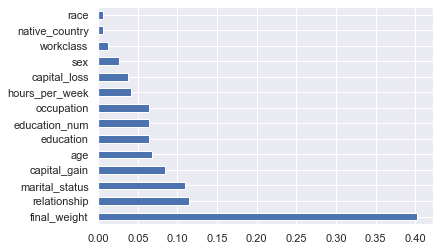

In [36]:
features_importance.plot(kind='barh')

* Final weight has the highest value of importance, 0.402 i.e 40% important
   - i.e- this feature has the highest impact on the income class 
* workclass, native_country, race is the least important features less than 2% 
   - In the next they will be excluded from the features set

### Data Encoding

* Using Label Encoding to encode categorical features in order to use them in the modeling section 

In [37]:
le = preprocessing.LabelEncoder()
df[categorical_features] = df[categorical_features].apply(le.fit_transform)

* Using mapping method to encode the 'sex' feature manually 

In [38]:
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1}).astype(int)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              30162 non-null  int64 
 1   age             30162 non-null  int64 
 2   workclass       30162 non-null  int32 
 3   final_weight    30162 non-null  int64 
 4   education       30162 non-null  object
 5   education_num   30162 non-null  int64 
 6   marital_status  30162 non-null  int32 
 7   occupation      30162 non-null  int32 
 8   relationship    30162 non-null  int32 
 9   race            30162 non-null  int32 
 10  sex             30162 non-null  int32 
 11  capital_gain    30162 non-null  int64 
 12  capital_loss    30162 non-null  int64 
 13  hours_per_week  30162 non-null  int64 
 14  native_country  30162 non-null  int32 
 15  class           30162 non-null  int32 
 16  age_group       30162 non-null  object
dtypes: int32(8), int64(7), object(2)
memory usage: 3.2

#### Feature Importance - Validation After The Encoding

In [40]:
df_features_imp = df.copy()
df_features_imp.drop(columns=['id','age_group'],inplace=True)
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df_features_imp['class'])

categorical_attributes = df_features_imp.select_dtypes(include=[int,object]).drop('class',axis=1)


features_importance_encode = categorical_attributes.apply(compute_mutual_information).sort_values(ascending=False)

print(features_importance_encode)

final_weight      0.402437
relationship      0.115186
marital_status    0.109150
capital_gain      0.083834
age               0.067567
education         0.064736
education_num     0.064736
occupation        0.064597
hours_per_week    0.041709
capital_loss      0.037340
sex               0.025928
workclass         0.011856
native_country    0.006466
race              0.005749
dtype: float64


In [41]:
features_importance_encode.sub(features_importance)

final_weight      0.0
relationship      0.0
marital_status    0.0
capital_gain      0.0
age               0.0
education         0.0
education_num     0.0
occupation        0.0
hours_per_week    0.0
capital_loss      0.0
sex               0.0
workclass         0.0
native_country    0.0
race              0.0
dtype: float64

**Validation check of feature importance after the encoding - No changes**

### Data correlation

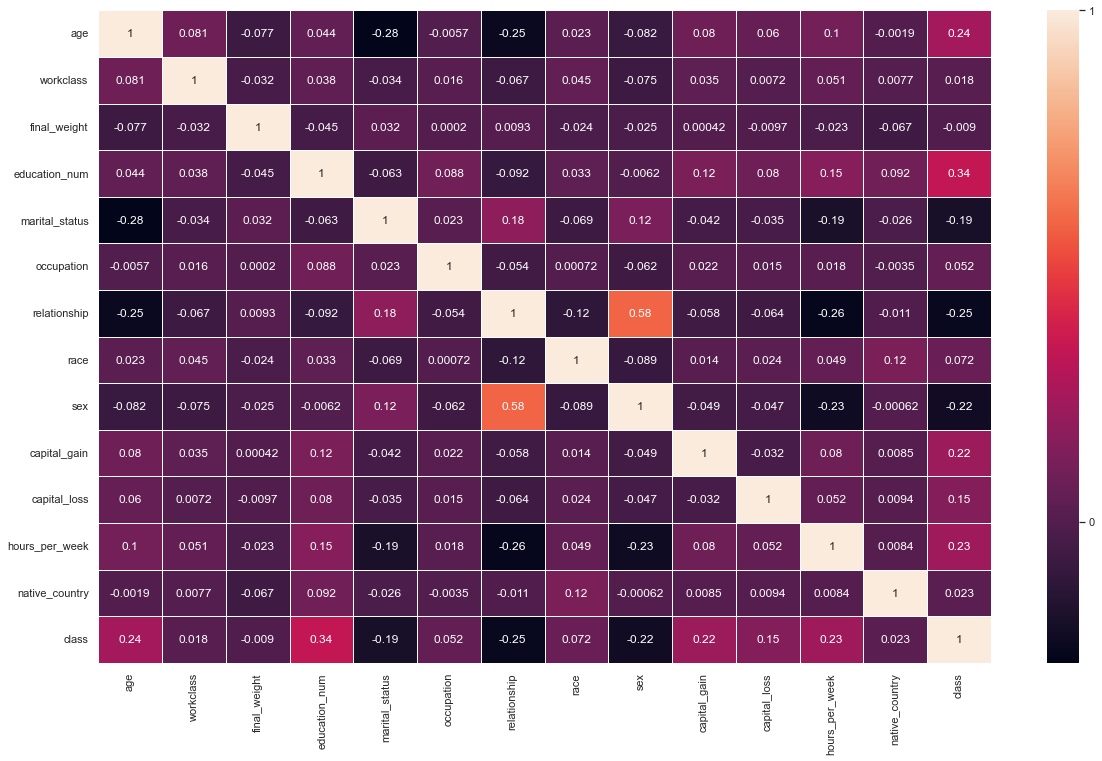

In [42]:
df_corr = df.drop(['id','age_group'], axis=1)
corr_final = df_corr.corr()
plt.figure(figsize = (20,12))
sns.heatmap(corr_final, annot=True,linewidths=.5,annot_kws={"fontsize":12})
sns.set(font_scale=16) 
plt.show()

* Positive and strong correlation between income class and education num 
* Positive and a semi strong correlation between income class and: age, capital_gain,hours_per_week
* Inverse and a semi strong correlation between income class and: marital_status, relationship, sex(gender)
* Positive and moderate correlation between income class and capital loss
* Very week correlation between income class: final_weight, workclass race, native_country
* The above results prove what was mentioned on the EDA section

### Train / Test Split

* 'id', 'age_group' are irrelevant to the prediction procedure 
* 'education' feature will be remved, instead we will keep the education num (the category version of the column)
* 'race','native_country','workclass' are the least important features according to 4.3 thus they will be removed as well 

In [43]:
X = df.drop(['id','class','age_group','education','race','native_country','workclass'], axis=1)
y = df['class']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345) 

### Scaling The Data

**Scaling numerical features only to prevent data leakage**

In [45]:
scaler = MinMaxScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [46]:
X_train.head()

,age,final_weight,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week
11826,0.575342,0.261641,16,0,9,4,0,0.252363,0.000000,0.448980
19292,0.369863,0.089383,14,2,9,0,0,0.000000,0.000000,0.438776
3862,0.328767,0.073388,11,2,12,0,0,0.000000,0.424242,0.479592
7019,0.410959,0.310101,12,2,10,0,0,0.000000,0.399449,0.397959
11473,0.260274,0.131040,9,4,6,1,0,0.000000,0.000000,0.397959


* We mentioned on the EDA section that the targest class is imbalanced and we see that here also after the splitting step
* We will perform downsampling to the train set and work with it on the modeling procedure

In [47]:
from sklearn.utils import shuffle
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]) 
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )
    
    return features_downsampled, target_downsampled



X_train_underSample, y_train_underSample = downsample(
    X_train, y_train, 0.50
)

### Evaluation Procedure

Creating a method that take the train and test set with a model fitted on the train set
For each set calculate :
<li> accuracy score </li>
<li> F1 Score </li>
<li> PRC - Average Precision Score </li>
<li>AUC-ROC score</li>

In [48]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}

    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # Accuracy
        acc_score = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        
        # F1 Score
        f_1_score = metrics.f1_score(target, pred_target)
        eval_stats[type]['F1'] = f_1_score
       
        # PRC
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        # ROC
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc


    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

## Modeling

### Random  Forest Model

In [49]:
%%time
random_forest = RandomForestClassifier(n_estimators=5,random_state=54321)
random_forest.fit(X_train_underSample, y_train_underSample)
evaluate_model(random_forest,X_train_underSample, y_train_underSample, X_test, y_test)

          train  test
Accuracy   0.97  0.82
F1         0.97  0.67
APS        0.99  0.66
ROC AUC    1.00  0.87
CPU times: total: 406 ms
Wall time: 406 ms


* Random Forest: High metrics values on the train set and low values on the test set especially of the F1 score 

### Logistic Regression Model

In [50]:
%%time
from sklearn.linear_model import LogisticRegression 
log_reg=LogisticRegression(solver='liblinear',random_state=12345,C=5000)
log_reg.fit(X_train_underSample, y_train_underSample)
evaluate_model(log_reg,X_train_underSample, y_train_underSample, X_test, y_test)

          train  test
Accuracy   0.77  0.80
F1         0.69  0.62
APS        0.80  0.69
ROC AUC    0.85  0.85
CPU times: total: 391 ms
Wall time: 438 ms


*  Metrics values on the train set and test set can not be considered high enough 

### LightGBM 

In [51]:
%%time
LGBM_classifier = LGBMClassifier(random_seed=12345,n_estimators=1000,learning_rate = 0.01)
LGBM_classifier.fit(X_train_underSample, y_train_underSample)
evaluate_model(LGBM_classifier,X_train_underSample, y_train_underSample, X_test, y_test)

          train  test
Accuracy   0.87  0.85
F1         0.84  0.74
APS        0.93  0.83
ROC AUC    0.95  0.93
CPU times: total: 34.6 s
Wall time: 17.1 s


* High metric values on the train set and test set

### Cat Boost Model

In [52]:
%%time
CBT_classifier = CatBoostClassifier(random_seed=12345,silent=True,iterations= 1000,learning_rate=0.05)
CBT_classifier.fit(X_train_underSample, y_train_underSample)
evaluate_model(CBT_classifier, X_train_underSample, y_train_underSample, X_test, y_test)

          train  test
Accuracy   0.89  0.85
F1         0.86  0.73
APS        0.95  0.83
ROC AUC    0.96  0.93
CPU times: total: 27.7 s
Wall time: 18.7 s


* High metric values on the train set and test set

## Evaluating performance

**LGBM has the highest metrics on the test set acroos all the four models**
<ul>
<li>LGBM is the best model, due to the highest metrics result on the test set</li>
<li>There are tiny difference between the results of the catboost models, LGBM beats it with 0.01 on the f1 score</li>
<li>ROC AUC values are the highest among the other metric values across all the models</li>
<li>F1 Score values are the lowest among the other metric values across all the models</li>    
</ul>

## Conclusions

* In the first stage, we load all of the initial libraries and imports


* In the second stage, we load the data and get overlook of the data:
  * we observed the size of the dataset 
  * we observed the data types
  * we found that there are no null values in the dataset
  
  
* In the data cleaning stage:
   * We change all the names of the columns, so that each attribute it's first letter is a lower case and that is for convenience purposes only. replace '-' with '_'
   
   * We observed the value counts for each column, found:
      * there are unusual values '?' in columns: workclass, occupation and native_country
      * these values were replace by NaN, because of their types
   * Size of dataframe with no missing values is 92.63% of the original size
   * Add new column 'age_group' 
      * The highest age group 31-40 with frequency of 8163 entries
      * The lowest age group is 81-90 
   
   
* In the EDA stage, we found:
  * The ratio of employess who gain <=50K is much higher than those who gain >50K, indicates that the class is imbalanced
  * There are two times of Male Data than this of Females
  * Density of female employees is higher where the income class is less/equal 50K than this where the income class is higher than 50K
    * For males it is the opposite of the above
  * Between 35 -50 there are the highest density of employees who gain more than 50K
  * Between 20-35 there are the highest density of employees who gain less/equal than 50K
  * Most employees who have zero capital gain have income class of <=50K
  * Employees with low capital loss values usually gain less/equal than 50K
  * Between capital loss values 1700-2000 employees are usually gain more than 50K
  * The density of employees who work around 40 hours and have income class of <=50K is higher than those who have income class of >50K 
  * The density of employees who work between 50-60 hours and have income class of >50K is higher than those who have income class of <=50K
  * It seems that there are no big difference on the density between the two groups in the range final weight 0-0.6e
  * It can be concluded that the higher education level the higher is the income level
  * Never married, Separated,Married-spouse-absent, Widowed employees usually gain less than 50K
  * Employees with own child relationship have the highest density around income class of <=50K 
  * Employees with 'Not in family, unmarried, other relative' relationship type usually get <=50k
  * Employees with 'Husband'/'wife' relationship their income class seems to be unpredictable - half get <=50K the other half get >50K
  * On an overall look there are no occupation type that has significant high density around >50K 
  
  
* In the Data Preparation stage:
  * Change Data Type Of Target
  * Observe the features importance, found: 
    * the most important one is 'final_Weight'
    * workclass, native_country, race is the least important features less than 2%
  * Perform Label Encoding for categorical features
  * Observe the features correlations, found: 
    * Positive and strong correlation between income class and education num

  * Perform Data split train/test :
    * Remove some columns from the feature due to being irrelevant to the prediction procedure 
    * Split the data into features and target
    * Split features and target into train and test set 
  * Scale the data using the min max scaler
  * We observed the class imbalance of the target, did a downsampling for the train set
  * Evaluation Procedure method was added 


* In the Modeling stage, found:
  * Random Forest: High metrics values on the train set and low values on the test set especially of the F1 score 
  * Logistic Regression: Metrics values on the train set and test set can not be considered high enough
  * LightGBM: High metric values on the train set and test set
  * CatBoost: High metric values on the train set and test set
  * LightGBM Catboost have very similar results
  
  
* In the Evaluating Performance stage: 
   * LGBM is the best model, due to the highest metrics result on the test set
   * ROC AUC values are the highest among the other metric values across all the models
  
  
  
* Final conclusion: Education Level, Age and Gender do effect the income class 